In [16]:
""" Importing cleaned data csv"""
import pandas as pd
from collections import Counter
books = pd.read_csv('books_cleaned.csv')
books.head()
books['Data'] = books['Data'].astype('unicode')
X, y = books.Data, books.guten_genre
print('Original dataset shape %s' % Counter(y))
subset = books[books['guten_genre'].isin([5, 2])]
X_s, y_s = subset.Data, subset.guten_genre
print('Original dataset shape %s' % Counter(y_s))


Original dataset shape Counter({5: 794, 2: 111, 7: 36, 8: 18, 6: 18, 3: 6, 4: 6, 1: 5, 0: 2})
Original dataset shape Counter({5: 794, 2: 111})


Accuracy: 0.765, Time duration: 155.13687348365784
Changed dataset shape y_train Counter({5: 641, 2: 89, 7: 25, 6: 13, 8: 12, 3: 5, 4: 5, 1: 4, 0: 2})
Changed dataset shape y_test Counter({5: 153, 2: 22, 7: 11, 8: 6, 6: 5, 4: 1, 1: 1, 3: 1})


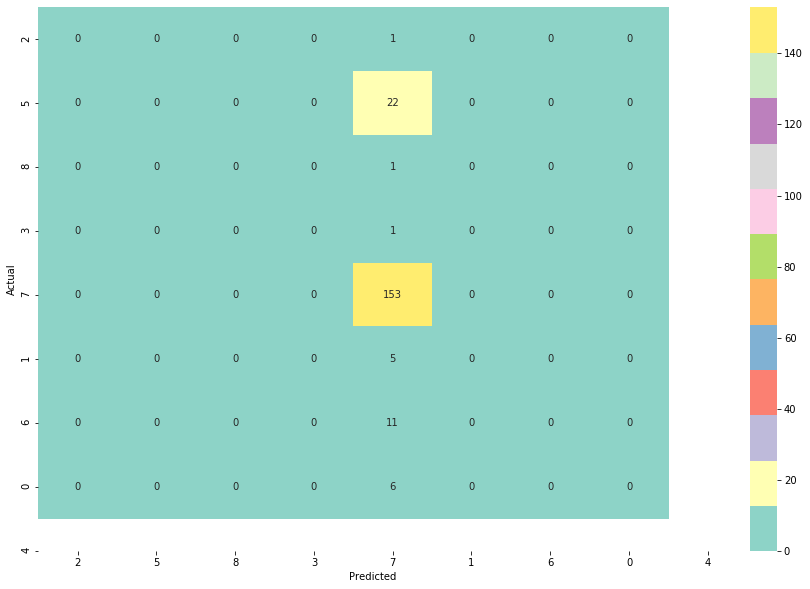

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.77      1.00      0.87       153
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         6

    accuracy                           0.77       200
   macro avg       0.10      0.12      0.11       200
weighted avg       0.59      0.77      0.66       200

                   NaiveBayes
Accuracy                0.765
Balanced accuracy       0.125


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
""" calling base line and balanced accuracy compariosn by making it in impbalance for better comparision"""

""" Making classification using pipline with only bag of words to check the under sampling effect"""

""" This fucntion basically cna be called from any pipline with hold out method, hence callling this for various sampling techniques"""

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import balanced_accuracy_score
from collections import Counter

def eve_clf(classifier, X, y , df_scores, clf_name=None):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

    classifier.fit(X_train, y_train)
    end = time.time()
    acc =classifier.score(X_test, y_test)

    print("Accuracy: " + str(classifier.score(X_test, y_test)) + ", Time duration: " + str(end - start))
    print('Changed dataset shape y_train %s' % Counter(y_train))
    print('Changed dataset shape y_test %s' % Counter(y_test))
    y_pred = classifier.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    #balanced accuracy
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    clf_score = pd.DataFrame(
        {clf_name: [acc, bal_acc]},
        index=['Accuracy', 'Balanced accuracy']
    )
    
    # Plot confusion_matrix
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(conf_mat, annot=True, cmap = "Set3", fmt ="d",
    xticklabels=books.guten_genre.unique(), yticklabels=books.guten_genre.unique())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print(classification_report(y_test, y_pred))
    df_scores = pd.concat([df_scores, clf_score], axis=1).round(decimals=3)
    return df_scores

df_scores = pd.DataFrame()

#Calling with NB
trial1 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))), ('classifier', MultinomialNB())])


#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial1, X, y, df_scores,'NaiveBayes')
print(df_scores)

Accuracy: 0.77, Time duration: 194.56112813949585
Changed dataset shape y_train Counter({5: 641, 2: 89, 7: 25, 6: 13, 8: 12, 3: 5, 4: 5, 1: 4, 0: 2})
Changed dataset shape y_test Counter({5: 153, 2: 22, 7: 11, 8: 6, 6: 5, 4: 1, 1: 1, 3: 1})


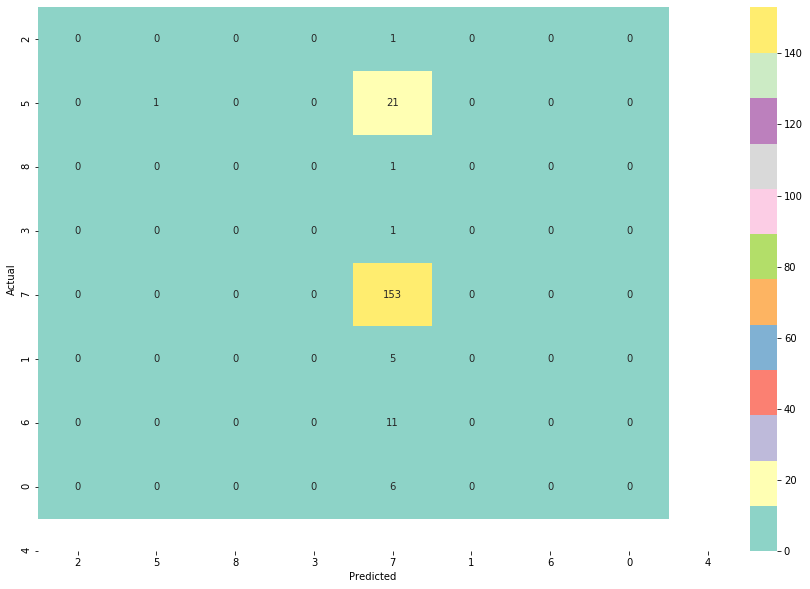

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.05      0.09        22
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.77      1.00      0.87       153
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         6

    accuracy                           0.77       200
   macro avg       0.22      0.13      0.12       200
weighted avg       0.70      0.77      0.67       200

                   NaiveBayes     LR
Accuracy                0.765  0.770
Balanced accuracy       0.125  0.131


In [39]:
"""Calling it with logistic regression"""

from sklearn.linear_model import LogisticRegression

trial2 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))), ('classifier', LogisticRegression())])

#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR')
print(df_scores)

Accuracy: 0.77, Time duration: 224.9608669281006
Changed dataset shape y_train Counter({5: 641, 2: 89, 7: 25, 6: 13, 8: 12, 3: 5, 4: 5, 1: 4, 0: 2})
Changed dataset shape y_test Counter({5: 153, 2: 22, 7: 11, 8: 6, 6: 5, 4: 1, 1: 1, 3: 1})


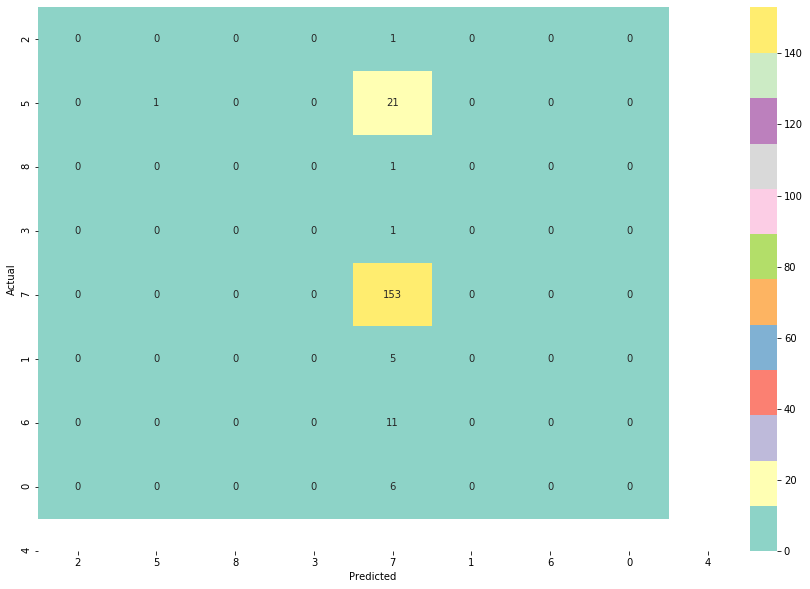

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.05      0.09        22
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.77      1.00      0.87       153
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         6

    accuracy                           0.77       200
   macro avg       0.22      0.13      0.12       200
weighted avg       0.70      0.77      0.67       200

                   NaiveBayes     LR  LR with SMOTE-NC
Accuracy                0.765  0.770             0.770
Balanced accuracy       0.125  0.131             0.131


In [40]:
#Checking individual Oversampling techniques

""" Over sampling 1. Checking Regular SMOTE-NC"""

from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import make_pipeline as make_pipeline_imb


trial3 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         SMOTENC(categorical_features=(X.shape)),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR with SMOTE-NC')
print(df_scores)

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTENC # doctest: +NORMALIZE_WHITESPACE
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(stop_words=stopwords.words('english'))
X_t=tfv.fit_transform(X)
sm = SMOTENC(categorical_features=(X.shape), k_neighbors=1)
X_res, y_res = sm.fit_resample(X_t, y)
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=11)
classifier=LogisticRegression()
classifier.fit(X_train, y_train)
acc =classifier.score(X_test, y_test)
print("Accuracy: " + str(classifier.score(X_test, y_test)))

KeyboardInterrupt: 

Accuracy: 0.7777777777777778, Time duration: 7.465426921844482


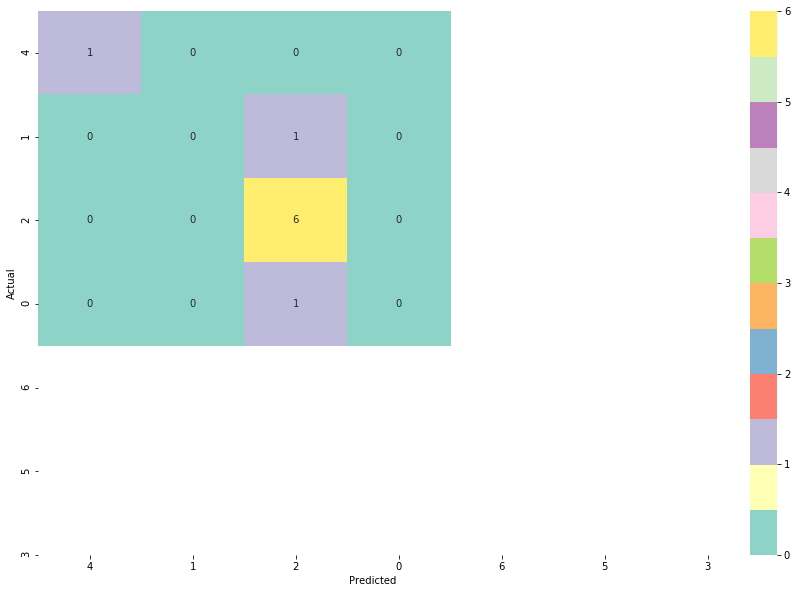

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with SMOTE-NC  LR with regular SMOTE
Accuracy                0.667  0.778             0.778                  0.778
Balanced accuracy       0.250  0.500             0.500                  0.500


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
""" Over smapling- 2. Checking Regular SMOTE"""

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imb


trial3 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         SMOTE(),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR with regular SMOTE')
print(df_scores)

Accuracy: 0.7777777777777778, Time duration: 10.60460638999939


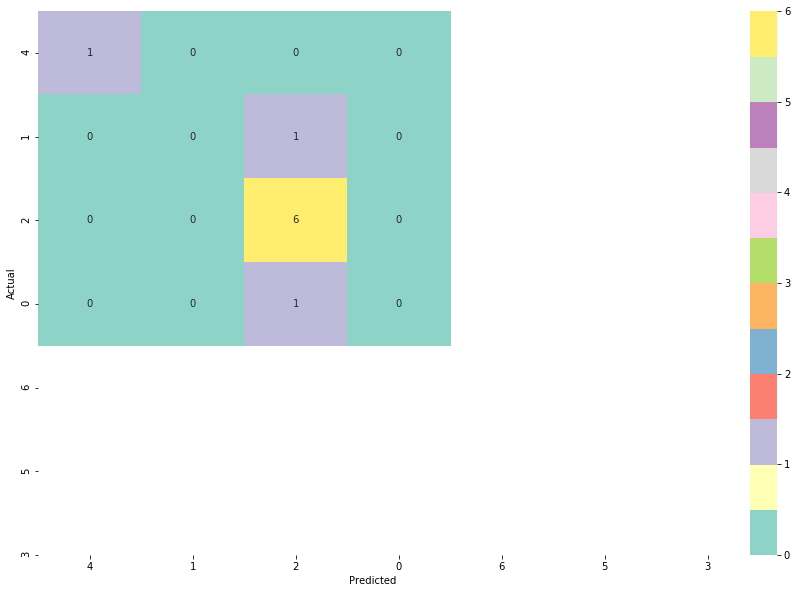

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with SMOTE-NC  LR with regular SMOTE  \
Accuracy                0.667  0.778             0.778                  0.778   
Balanced accuracy       0.250  0.500             0.500                  0.500   

                   LR with Random UnderSampling  LR with RandomOverSampler  
Accuracy                                  0.111                      0.778  
Balanced accuracy                         0.250                      0.500  
Accuracy: 0.7777777777777778, Time duration: 7.4804277420043945


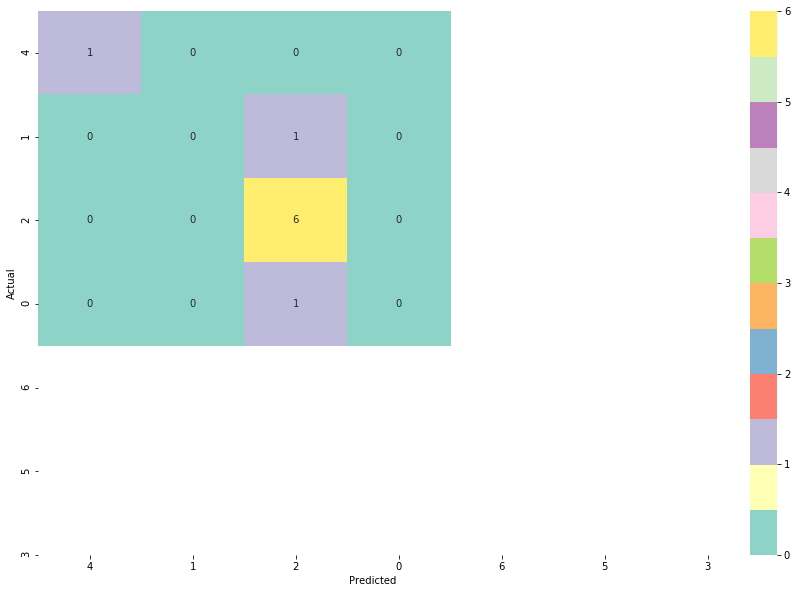

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with SMOTE-NC  LR with regular SMOTE  \
Accuracy                0.667  0.778             0.778                  0.778   
Balanced accuracy       0.250  0.500             0.500                  0.500   

                   LR with Random UnderSampling  LR with RandomOverSampler  \
Accuracy                                  0.111                      0.778   
Balanced accuracy                         0.250                      0.500   

                   LR with RandomOverSampler Minority  
Accuracy                      

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
""" Over smapling- 3. Random Oversampling"""

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb


trial3 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         RandomOverSampler(),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR with RandomOverSampler')
print(df_scores)


trial4 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         RandomOverSampler('minority'),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR with RandomOverSampler Minority')
print(df_scores)

Accuracy: 0.7777777777777778, Time duration: 8.074461698532104


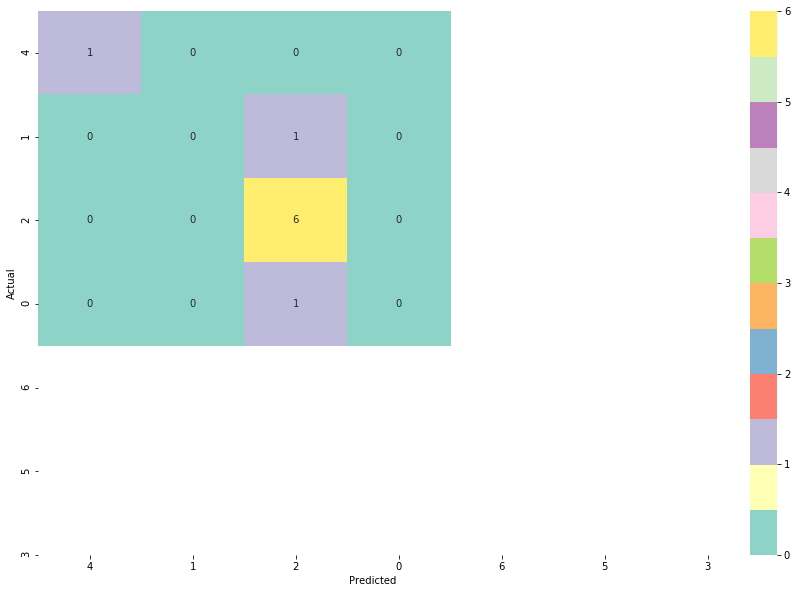

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with SMOTE-NC  LR with regular SMOTE  \
Accuracy                0.667  0.778             0.778                  0.778   
Balanced accuracy       0.250  0.500             0.500                  0.500   

                   LR with Random UnderSampling  LR with RandomOverSampler  \
Accuracy                                  0.111                      0.778   
Balanced accuracy                         0.250                      0.500   

                   LR with RandomOverSampler Minority  LR with ADASYN  
Accuracy      

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
""" Over smapling- 4. ADASYN"""

from imblearn.over_sampling import ADASYN
from imblearn.pipeline import make_pipeline as make_pipeline_imb


trial3 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         ADASYN(),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR with ADASYN')
print(df_scores)


Accuracy: 0.7777777777777778, Time duration: 9.40353775024414


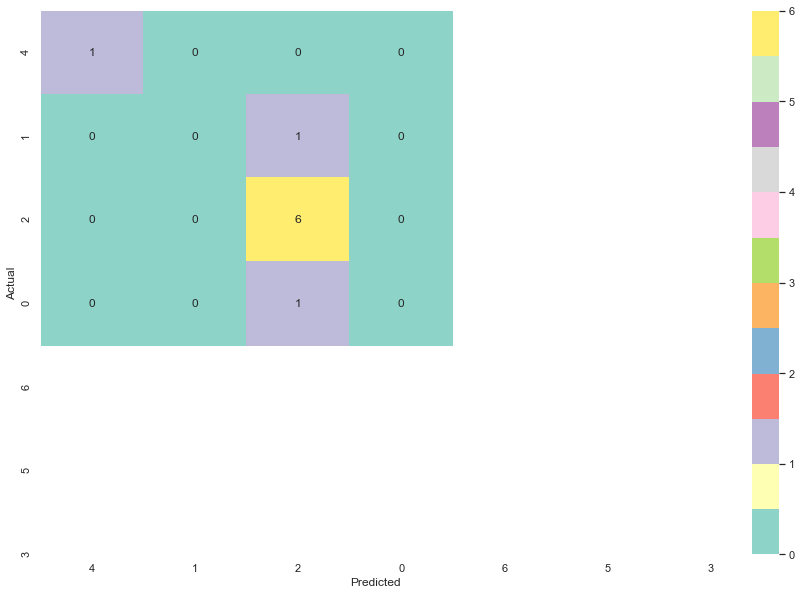

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with weights
Accuracy                0.667  0.778            0.778
Balanced accuracy       0.250  0.500            0.500


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
""" Logistic regression with weights balanced"""


# Using class_weights

trial3 = Pipeline([ ('vectorizer', TfidfVectorizer(stop_words=stopwords.words('english'))), ('classifier', LogisticRegression(class_weight="balanced"))])

#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, books.Data, books.guten_genre, df_scores,'LR with weights')
print(df_scores)

Accuracy: 0.3333333333333333, Time duration: 8.906509637832642


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


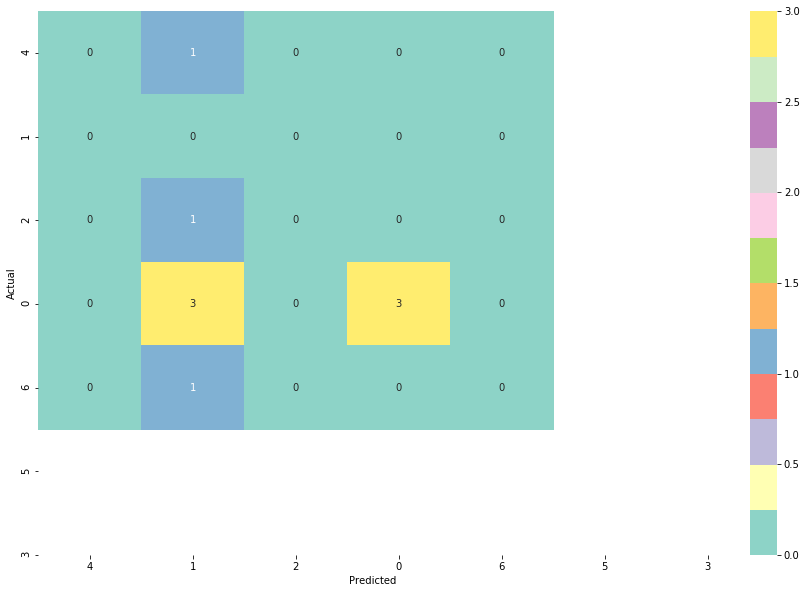

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         1

    accuracy                           0.33         9
   macro avg       0.20      0.10      0.13         9
weighted avg       0.67      0.33      0.44         9

                   NaiveBayes     LR  LR with SMOTE-NC  LR with regular SMOTE  \
Accuracy                0.667  0.778             0.778                  0.778   
Balanced accuracy       0.250  0.500             0.500                  0.500   

                   LR with Random UnderSampling  LR with RandomOverSampler  \
Accuracy                                  0.111                      0.778   
Balanced accuracy                         0.250                      0.500   

                   LR with Rando

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
""" Trying with Under Sampling methods individually"""
""" 1. random under sampling"""

from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb

trial4 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         RandomUnderSampler(),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial4, X, y, df_scores,'LR with Random UnderSampling')
print(df_scores)

Accuracy: 0.1111111111111111, Time duration: 7.650040626525879


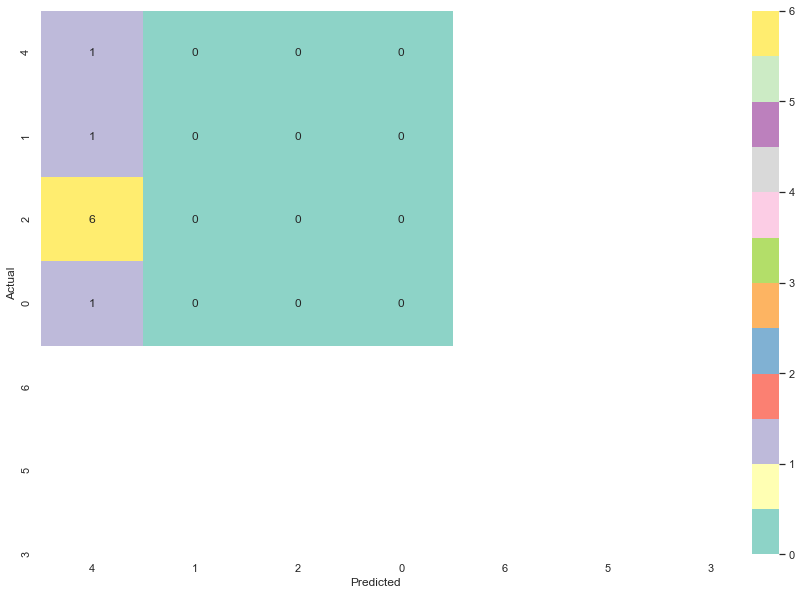

              precision    recall  f1-score   support

           1       0.11      1.00      0.20         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         1

    accuracy                           0.11         9
   macro avg       0.03      0.25      0.05         9
weighted avg       0.01      0.11      0.02         9

                   NaiveBayes     LR  LR with weights  \
Accuracy                0.667  0.778            0.778   
Balanced accuracy       0.250  0.500            0.500   

                   LR with Random UnderSampling  LR with Random UnderSampling  
Accuracy                                    0.0                         0.111  
Balanced accuracy                           0.0                         0.250  


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
""" 2.random under with only majority class sampling"""

from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb

trial4 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         RandomUnderSampler('majority'),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial4, X, y, df_scores,'LR with RandomUnderSampling majority')
print(df_scores)

Accuracy: 0.7777777777777778, Time duration: 8.490485668182373


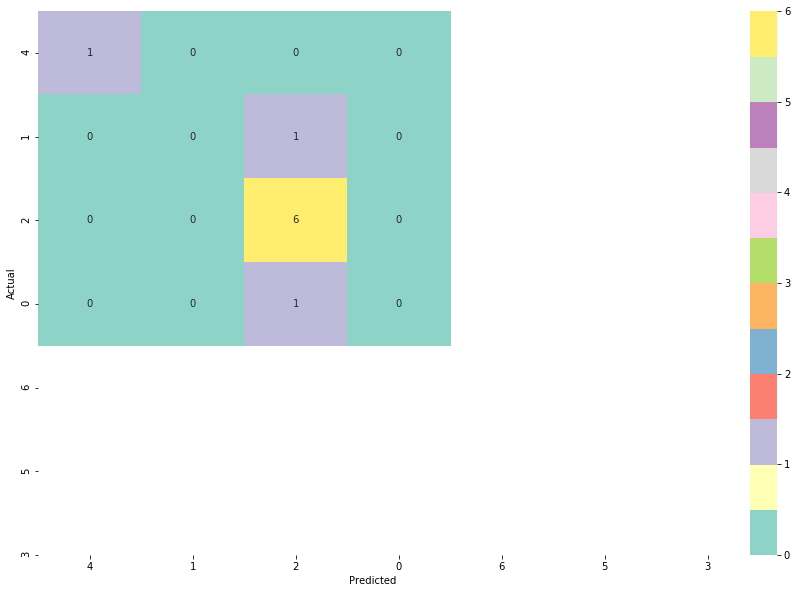

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with SMOTE-NC  LR with regular SMOTE  \
Accuracy                0.667  0.778             0.778                  0.778   
Balanced accuracy       0.250  0.500             0.500                  0.500   

                   LR with Random UnderSampling  LR with RandomOverSampler  \
Accuracy                                  0.111                      0.778   
Balanced accuracy                         0.250                      0.500   

                   LR with RandomOverSampler Minority  LR with ADASYN  \
Accuracy     

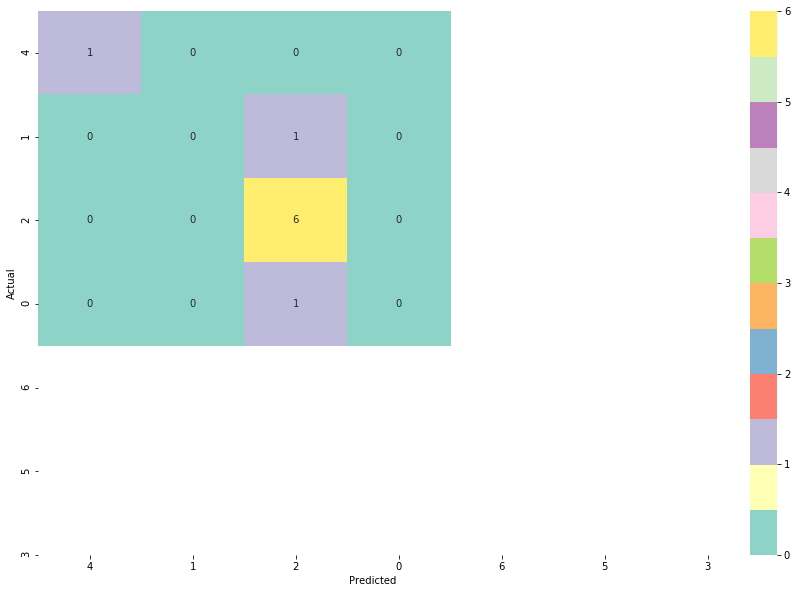

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with SMOTE-NC  LR with regular SMOTE  \
Accuracy                0.667  0.778             0.778                  0.778   
Balanced accuracy       0.250  0.500             0.500                  0.500   

                   LR with Random UnderSampling  LR with RandomOverSampler  \
Accuracy                                  0.111                      0.778   
Balanced accuracy                         0.250                      0.500   

                   LR with RandomOverSampler Minority  LR with ADASYN  \
Accuracy     

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'\nNext Steps are-\n1. Run all these with complete data and document\n2. decide on undersampling tehcniques\n3. Check over sampling techniques like this one by one\n4. find best over sampling combination on which fetaures to duplicate\n5. check the matrix\n6. try SMOTE on sparse data\n7. finally try it in combination\n8. decide the outcome to pass for feature enginerring\n'

In [20]:
""" 3. Methods for selecting which fetaures to keep in under sampling"""


# Undersample imbalanced dataset with NearMiss-3
from collections import Counter
from imblearn.under_sampling import NearMiss
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

"""
# summarize class distribution
counter = Counter(y_train)
print(counter)
"""

#condensed

n_c = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         CondensedNearestNeighbour(n_neighbors=1),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_c, X, y, df_scores,'LR with CondensedNN')
print(df_scores)


#using Tomek Links
n_c = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         TomekLinks(),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_c, X, y, df_scores,'LR with Tomek Links')
print(df_scores)



#this shall give accuracy on NearMiss3
""" This need number of neighbours to be higer than number of samples """
"""
n_3 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         NearMiss(version=3, n_neighbors_ver3=1),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_3, X, y, df_scores,'LR with NMiss3')
print(df_scores)



#Edited Nearest Neighbour

n_ENN = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         EditedNearestNeighbours(n_neighbors=3),
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(n_3, X, y, df_scores,'LR with ENN')
print(df_scores)

"""
## Need to run combination of these to select best undersampling technique
"""
Next Steps are-
1. Run all these with complete data and document
2. decide on undersampling tehcniques
3. Check over sampling techniques like this one by one
4. find best over sampling combination on which fetaures to duplicate
5. check the matrix
6. try SMOTE on sparse data
7. finally try it in combination
8. decide the outcome to pass for feature enginerring
"""

Accuracy: 0.7777777777777778, Time duration: 10.032573699951172


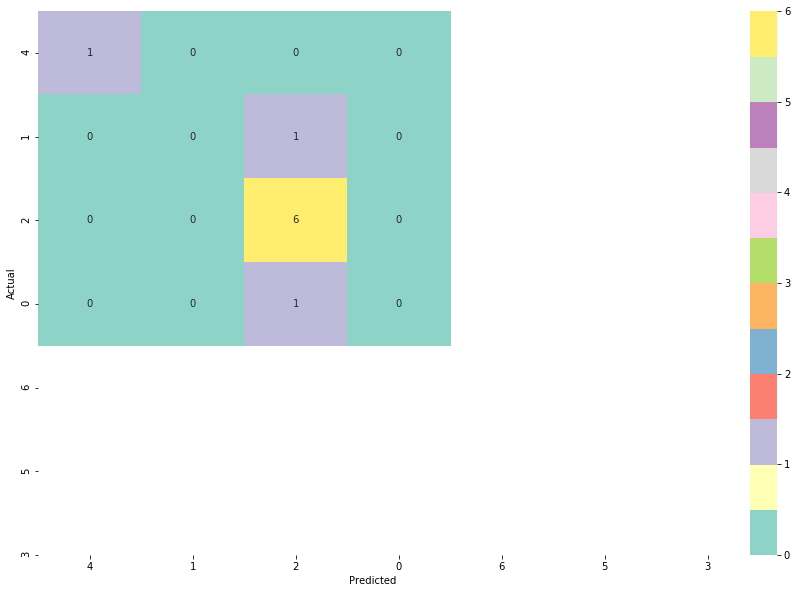

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         6
           5       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.44      0.50      0.46         9
weighted avg       0.61      0.78      0.68         9

                   NaiveBayes     LR  LR with SMOTE-NC  LR with regular SMOTE  \
Accuracy                0.667  0.778             0.778                  0.778   
Balanced accuracy       0.250  0.500             0.500                  0.500   

                   LR with Random UnderSampling  LR with RandomOverSampler  \
Accuracy                                  0.111                      0.778   
Balanced accuracy                         0.250                      0.500   

                   LR with RandomOverSampler Minority  LR with ADASYN  \
Accuracy     

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# Combine SMOTE-NC and random undersampling
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb


trial3 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         SMOTENC(categorical_features=(X.shape)),
                         RandomUnderSampler(),  
                         LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR SMOTENC+ROS')
print(df_scores)


Accuracy: 0.03, Time duration: 231.5052411556244
Changed dataset shape y_train Counter({5: 641, 2: 89, 7: 25, 6: 13, 8: 12, 3: 5, 4: 5, 1: 4, 0: 2})
Changed dataset shape y_test Counter({5: 153, 2: 22, 7: 11, 8: 6, 6: 5, 4: 1, 1: 1, 3: 1})


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


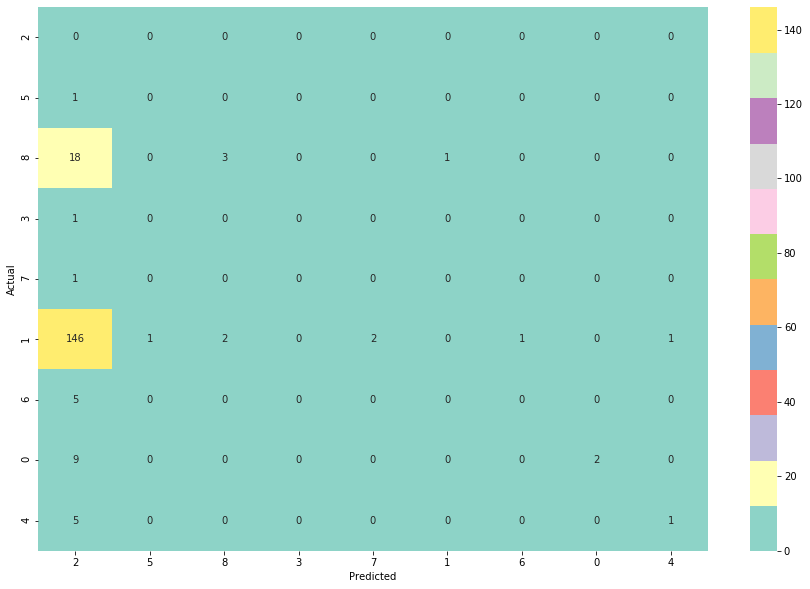

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.60      0.14      0.22        22
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00       153
           6       0.00      0.00      0.00         5
           7       1.00      0.18      0.31        11
           8       0.50      0.17      0.25         6

    accuracy                           0.03       200
   macro avg       0.23      0.05      0.09       200
weighted avg       0.14      0.03      0.05       200

                   NaiveBayes  NB SMOTENC+ROS
Accuracy                0.765           0.030
Balanced accuracy       0.125           0.061


C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Combine SMOTE-NC and random undersampling with naivebayes
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from sklearn.naive_bayes import MultinomialNB


trial2 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                         RandomUnderSampler(),  
                         SMOTENC(categorical_features=(X.shape)),
                           MultinomialNB())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'NB SMOTENC+ROS')
print(df_scores)


Accuracy: 0.77, Time duration: 304.52441787719727
Changed dataset shape y_train Counter({5: 641, 2: 89, 7: 25, 6: 13, 8: 12, 3: 5, 4: 5, 1: 4, 0: 2})
Changed dataset shape y_test Counter({5: 153, 2: 22, 7: 11, 8: 6, 6: 5, 4: 1, 1: 1, 3: 1})


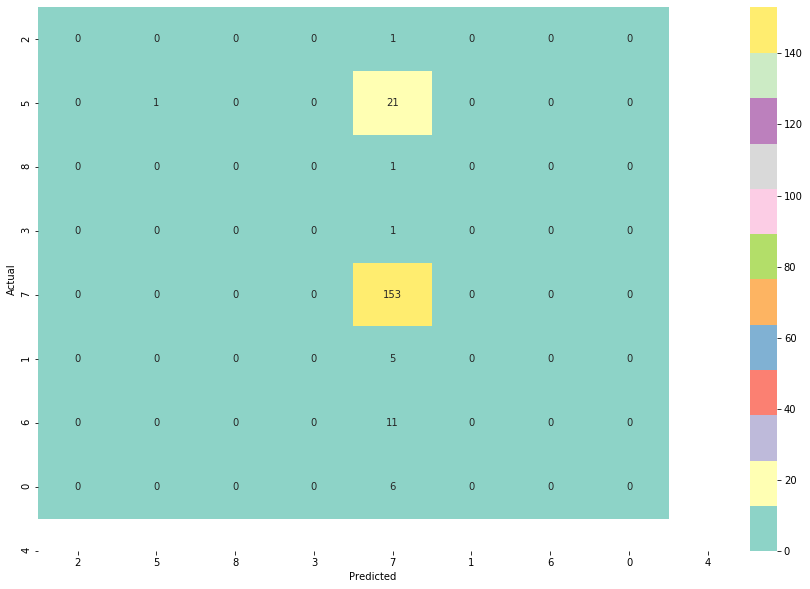

C:\Users\priyam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.05      0.09        22
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.77      1.00      0.87       153
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         6

    accuracy                           0.77       200
   macro avg       0.22      0.13      0.12       200
weighted avg       0.70      0.77      0.67       200

                   NaiveBayes     LR  LR with SMOTE-NC  LR SMOTENC+TL
Accuracy                0.765  0.770             0.770          0.770
Balanced accuracy       0.125  0.131             0.131          0.131


In [45]:
# Combine SMOTE-NC and Tomelinks
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline as make_pipeline_imb


trial3 = make_pipeline_imb(TfidfVectorizer(stop_words=stopwords.words('english')),
                           TomekLinks(),
                           SMOTENC(categorical_features=(X.shape)),
                           LogisticRegression())
#It shall just give me over alla ccuracy and CM for bag of words approach in imbalaned data
df_scores=eve_clf(trial2, X, y, df_scores,'LR SMOTENC+TL')
print(df_scores)

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from Collections import 


data = [['round red fruit that is sweet','apple'],['long yellow fruit with a peel','banana'],
    ['round green fruit that is soft and sweet','pear'], ['red fruit that is common', 'apple'],
    ['tiny fruits that grow in bunches','grapes'],['purple fruits', 'grapes'], ['yellow and long', 'banana'],
    ['round, small, green', 'grapes'], ['can be red, green, or purple', 'grapes'], ['tiny fruits', 'grapes'],
    ['small fruits', 'grapes']]

df = pd.DataFrame(data, columns=['Description','Type'])

X_train, X_test, y_train, y_test = train_test_split(df['Description'],
    df['Type'], random_state=0)

print('Changed dataset shape y_train %s' % Counter(y_train))
print('Changed dataset shape y_test %s' % Counter(y_test))


text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('RUS', RandomOverSampler()),
                    ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)

print('Score:',text_clf.score(X_test, y_test))


# https://stackoverflow.com/questions/56855496/output-of-shape-for-training-after-oversampling-with-imbalanced-learn

In [14]:
from collections import Counter
from sklearn.datasets import make_classification
from nltk.corpus import stopwords
from imblearn.under_sampling import OneSidedSelection # doctest: +NORMALIZE_WHITESPACE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(stop_words=stopwords.words('english'))
X_t=tfv.fit_transform(X_s)
#sm = SMOTENC(categorical_features=(X.shape), k_neighbors=1)
sm= RandomUnderSampler()
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=11)
classifier=LogisticRegression()
classifier.fit(X_train, y_train)
acc =classifier.score(X_test, y_test)
print("Accuracy: " + str(classifier.score(X_test, y_test)))

MemoryError: 